# Linear Regression
Slides: 23 - 30

In [44]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load dataset

In [45]:
boston = pd.read_csv('boston.csv')

type(boston)

pandas.core.frame.DataFrame

In [46]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Creating feature and target 

In [47]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

type(X)

numpy.ndarray

Predicting house value from a single feature

In [48]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [49]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

Plotting

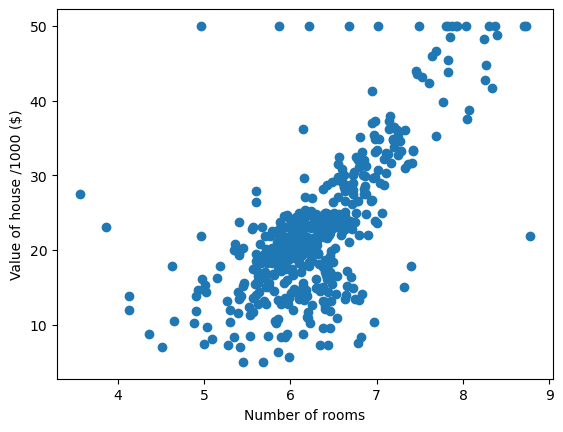

In [50]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_rooms, y)

LinearRegression()

In [53]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

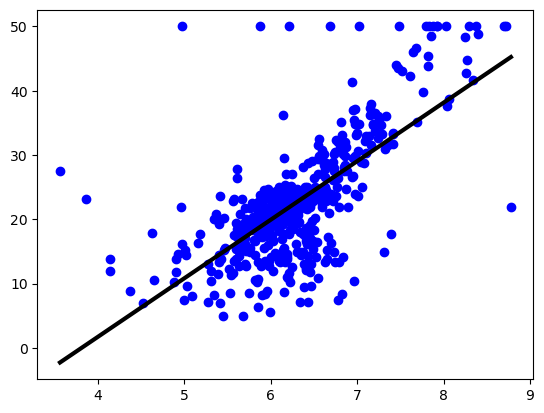

In [54]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, model.predict(prediction_space),
         color='black', linewidth=3)
plt.show()

# High Dimension Linear Regression
Slides: 31 - 32

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
reg_hd = LinearRegression()
reg_hd.fit(X_train, y_train)
y_pred = reg_hd.predict(X_test)

In [58]:
reg_hd.score(X_test, y_test)

0.7112260057484965

# Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [60]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)

In [61]:
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [62]:
np.mean(cv_results)

0.353275924395884

# Regularised Regression

In [63]:
from sklearn.linear_model import Ridge

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.6996938275127318

In [65]:
from sklearn.linear_model import Lasso

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(alpha=0.001, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.7097717791957663

# Polynomial

In [67]:
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

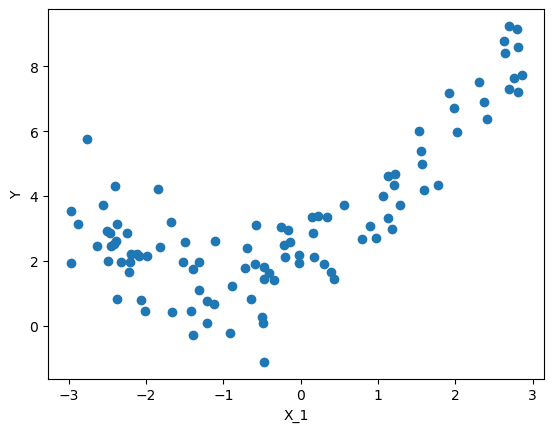

In [68]:
plt.scatter(X, y)
plt.ylabel('Y')
plt.xlabel('X_1')
plt.show()

In [69]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.45775093])

In [70]:
X_poly[0]

array([-2.45775093,  6.04053962])

In [71]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01966409]), array([[0.98719558, 0.48895337]]))

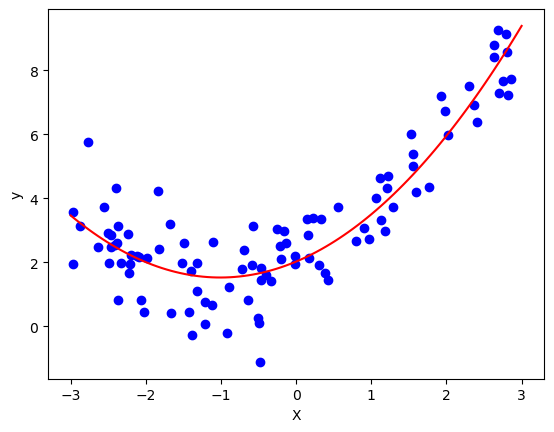

In [72]:
plt.scatter(X, y, color='blue')
X_fit = np.linspace(-3, 3, 100).reshape(-1, 1)
X_fit_poly = poly_features.transform(X_fit)
y_fit = lin_reg.predict(X_fit_poly)
plt.plot(X_fit, y_fit, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [74]:

# Importing the dataset
dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [75]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

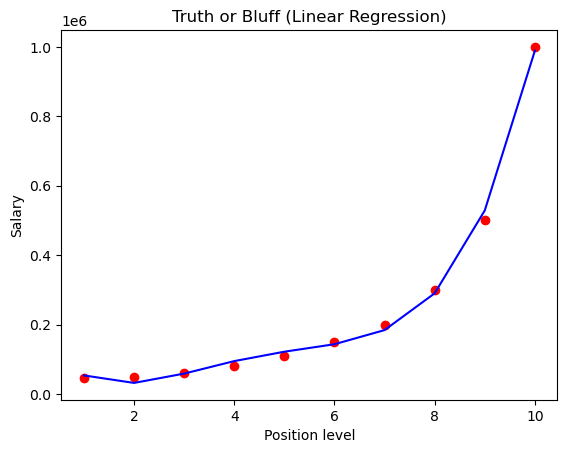

In [76]:

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()